# Model Hyperparameter Comparison

## Define the grid of hyperparameters

In [4]:
from lib_1_1.eval import chamfer_distance
from lib_1_1.model import Model1, Model2, Model3
from lib_1_1.training_loop  import train
from lib_1_1.data import load_data
from lib_1_1.config import TrainingConfig
from lib_1_1.diffusion import generate_samples_by_denoising, create_noise_schedule
from dataclasses import dataclass
import torch
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt


@dataclass
class ModelConfig:
    model: str
    hidden_features: list[int]
    train_steps: int

models = ["model1", "model2", "model3"]
layers = [[128], [256, 256], [512, 512], [256, 256, 256, 256, 256]]
train_steps = [1000, 5000, 10000]

model_configs = [
    ModelConfig(model=model, hidden_features=layer, train_steps=num_timestep)
    for model in models for layer in layers for num_timestep in train_steps
]
print(f"Number of model configs: {len(model_configs)}")

Number of model configs: 36


## Run model training experiments

This can take about 10 minutes to run.

In [10]:
train_config = TrainingConfig()
train_dataloader, _ = load_data(train_config)
device = "cuda" if torch.cuda.is_available() else "cpu"


noise_schedule = create_noise_schedule(train_config.num_denoising_steps, device)
losses = []
chamfer_distances = []
target_spiral = next(iter(train_dataloader))
for i, m_config in enumerate(model_configs):
    print(f"Experiment run {i+1} of {len(model_configs)}")
    model = None
    if m_config.model == "model1":
        model = Model1(hidden_features=m_config.hidden_features, num_timesteps=m_config.train_steps).to(device)
    elif m_config.model == "model2":
        model = Model2(hidden_features=m_config.hidden_features, num_timesteps=m_config.train_steps).to(device)
    elif m_config.model == "model3":
        model = Model3(
            hidden_features=m_config.hidden_features,
            num_timesteps=m_config.train_steps,
        ).to(device)
    print(f"{m_config.model}, Layers: {m_config.hidden_features}, Train Steps: {m_config.train_steps}")
    print(f"model params: {sum(p.numel() for p in model.parameters())}")
    optimizer = optim.AdamW(model.parameters(), lr=train_config.learning_rate, weight_decay=train_config.weight_decay)
    loss = train(model, train_dataloader=train_dataloader, optimizer=optimizer, steps=m_config.train_steps, noise_schedule=noise_schedule, device=device)
    print("loss:", loss.item())
    generated_points = generate_samples_by_denoising(model, torch.randn(128, 2), noise_schedule, n_T=1000, device=device)
    generated_points = generated_points.cpu().numpy()
    if m_config.model == "model1":
        # special treatment for model1
        generated_points = np.clip(generated_points, -3.6, 3.6)
    chamfer_dist = chamfer_distance(generated_points, target_spiral, direction='bi')
    chamfer_distances.append(chamfer_dist)
    print("Chamfer Distance:", chamfer_dist)


model1, Layers: [128], Train Steps: 1000
model params: 770
Training on device: cuda


  0%|          | 0/3125 [00:00<?, ?it/s]

Reached the max training steps: 1000
loss: 0.4509263038635254


100%|██████████| 1000/1000 [00:00<00:00, 1025.70it/s, std=50.1]


Chamfer Distance: 40.83210172000426
model1, Layers: [128], Train Steps: 5000
model params: 770
Training on device: cuda


  0%|          | 0/3125 [00:00<?, ?it/s]

Reached the max training steps: 5000
loss: 0.46364229917526245


100%|██████████| 1000/1000 [00:00<00:00, 1068.78it/s, std=64.4]


Chamfer Distance: 47.438745148771524
model1, Layers: [128], Train Steps: 10000
model params: 770
Training on device: cuda


  0%|          | 0/3125 [00:00<?, ?it/s]

Reached the max training steps: 10000
loss: 0.4620330333709717


100%|██████████| 1000/1000 [00:00<00:00, 1053.48it/s, std=58.7]


Chamfer Distance: 43.8795945442217
model1, Layers: [256, 256], Train Steps: 1000
model params: 67330
Training on device: cuda


  0%|          | 0/3125 [00:00<?, ?it/s]

Reached the max training steps: 1000
loss: 0.433613121509552


100%|██████████| 1000/1000 [00:00<00:00, 1025.87it/s, std=55.3]


Chamfer Distance: 34.900078827080634
model1, Layers: [256, 256], Train Steps: 5000
model params: 67330
Training on device: cuda


  0%|          | 0/3125 [00:00<?, ?it/s]

Reached the max training steps: 5000
loss: 0.41779962182044983


100%|██████████| 1000/1000 [00:00<00:00, 1030.43it/s, std=49.4]


Chamfer Distance: 37.8007218336046
model1, Layers: [256, 256], Train Steps: 10000
model params: 67330
Training on device: cuda


  0%|          | 0/3125 [00:00<?, ?it/s]

Reached the max training steps: 10000
loss: 0.4159809947013855


100%|██████████| 1000/1000 [00:00<00:00, 1027.20it/s, std=56.5]


Chamfer Distance: 41.10801919781987
model1, Layers: [512, 512], Train Steps: 1000
model params: 265730
Training on device: cuda


  0%|          | 0/3125 [00:00<?, ?it/s]

Reached the max training steps: 1000
loss: 0.4471423327922821


100%|██████████| 1000/1000 [00:01<00:00, 982.32it/s, std=64.2]


Chamfer Distance: 44.991998336324244
model1, Layers: [512, 512], Train Steps: 5000
model params: 265730
Training on device: cuda


  0%|          | 0/3125 [00:00<?, ?it/s]

Reached the max training steps: 5000
loss: 0.3601759076118469


100%|██████████| 1000/1000 [00:00<00:00, 1003.78it/s, std=64] 


Chamfer Distance: 47.84504672777196
model1, Layers: [512, 512], Train Steps: 10000
model params: 265730
Training on device: cuda


  0%|          | 0/3125 [00:00<?, ?it/s]

Reached the max training steps: 10000
loss: 0.44915974140167236


100%|██████████| 1000/1000 [00:01<00:00, 993.84it/s, std=56.1]


Chamfer Distance: 40.11150077540098
model1, Layers: [256, 256, 256, 256, 256], Train Steps: 1000
model params: 264706
Training on device: cuda


  0%|          | 0/3125 [00:00<?, ?it/s]

Reached the max training steps: 1000
loss: 0.42826491594314575


100%|██████████| 1000/1000 [00:01<00:00, 938.80it/s, std=64.7]


Chamfer Distance: 45.433996849178996
model1, Layers: [256, 256, 256, 256, 256], Train Steps: 5000
model params: 264706
Training on device: cuda


  0%|          | 0/3125 [00:00<?, ?it/s]

Reached the max training steps: 5000
loss: 0.43620750308036804


100%|██████████| 1000/1000 [00:01<00:00, 956.80it/s, std=68.4]


Chamfer Distance: 47.47955309238842
model1, Layers: [256, 256, 256, 256, 256], Train Steps: 10000
model params: 264706
Training on device: cuda


  0%|          | 0/3125 [00:00<?, ?it/s]

Reached the max training steps: 10000
loss: 0.4281949996948242


100%|██████████| 1000/1000 [00:01<00:00, 941.21it/s, std=56.2]


Chamfer Distance: 40.01103618165592
model2, Layers: [128], Train Steps: 1000
model params: 4738
Training on device: cuda


  0%|          | 0/3125 [00:00<?, ?it/s]

Reached the max training steps: 1000
loss: 0.3815053701400757


100%|██████████| 1000/1000 [00:00<00:00, 1000.22it/s, std=1.9]


Chamfer Distance: 0.9952134982106191
model2, Layers: [128], Train Steps: 5000
model params: 4738
Training on device: cuda


  0%|          | 0/3125 [00:00<?, ?it/s]

Reached the max training steps: 5000
loss: 0.342546284198761


100%|██████████| 1000/1000 [00:00<00:00, 1014.42it/s, std=2.02]


Chamfer Distance: 0.9870064848257294
model2, Layers: [128], Train Steps: 10000
model params: 4738
Training on device: cuda


  0%|          | 0/3125 [00:00<?, ?it/s]

Reached the max training steps: 10000
loss: 0.40761643648147583


100%|██████████| 1000/1000 [00:00<00:00, 1019.49it/s, std=1.95]


Chamfer Distance: 0.826520714937363
model2, Layers: [256, 256], Train Steps: 1000
model params: 75266
Training on device: cuda


  0%|          | 0/3125 [00:00<?, ?it/s]

Reached the max training steps: 1000
loss: 0.40317225456237793


100%|██████████| 1000/1000 [00:01<00:00, 990.18it/s, std=1.98]


Chamfer Distance: 0.9103175682988993
model2, Layers: [256, 256], Train Steps: 5000
model params: 75266
Training on device: cuda


  0%|          | 0/3125 [00:00<?, ?it/s]

Reached the max training steps: 5000
loss: 0.4225660264492035


100%|██████████| 1000/1000 [00:01<00:00, 976.46it/s, std=1.98]


Chamfer Distance: 0.6969788011770026
model2, Layers: [256, 256], Train Steps: 10000
model params: 75266
Training on device: cuda


  0%|          | 0/3125 [00:00<?, ?it/s]

Reached the max training steps: 10000
loss: 0.34160494804382324


100%|██████████| 1000/1000 [00:01<00:00, 971.04it/s, std=1.95] 


Chamfer Distance: 0.5928464470174432
model2, Layers: [512, 512], Train Steps: 1000
model params: 281602
Training on device: cuda


  0%|          | 0/3125 [00:00<?, ?it/s]

Reached the max training steps: 1000
loss: 0.3745132386684418


100%|██████████| 1000/1000 [00:00<00:00, 1001.80it/s, std=1.94]


Chamfer Distance: 0.8723187112974164
model2, Layers: [512, 512], Train Steps: 5000
model params: 281602
Training on device: cuda


  0%|          | 0/3125 [00:00<?, ?it/s]

Reached the max training steps: 5000
loss: 0.4065595269203186


100%|██████████| 1000/1000 [00:01<00:00, 955.66it/s, std=2]   


Chamfer Distance: 0.6087286500392258
model2, Layers: [512, 512], Train Steps: 10000
model params: 281602
Training on device: cuda


  0%|          | 0/3125 [00:00<?, ?it/s]

Reached the max training steps: 10000
loss: 0.32167112827301025


100%|██████████| 1000/1000 [00:00<00:00, 1011.62it/s, std=1.97]


Chamfer Distance: 0.46802006722301026
model2, Layers: [256, 256, 256, 256, 256], Train Steps: 1000
model params: 272642
Training on device: cuda


  0%|          | 0/3125 [00:00<?, ?it/s]

Reached the max training steps: 1000
loss: 0.4069325625896454


100%|██████████| 1000/1000 [00:01<00:00, 934.27it/s, std=2]   


Chamfer Distance: 0.6562601955836662
model2, Layers: [256, 256, 256, 256, 256], Train Steps: 5000
model params: 272642
Training on device: cuda


  0%|          | 0/3125 [00:00<?, ?it/s]

Reached the max training steps: 5000
loss: 0.3000778257846832


100%|██████████| 1000/1000 [00:01<00:00, 898.61it/s, std=1.94]


Chamfer Distance: 0.23615802336684183
model2, Layers: [256, 256, 256, 256, 256], Train Steps: 10000
model params: 272642
Training on device: cuda


  0%|          | 0/3125 [00:00<?, ?it/s]

Reached the max training steps: 10000
loss: 0.3427009582519531


100%|██████████| 1000/1000 [00:01<00:00, 901.10it/s, std=1.93]


Chamfer Distance: 0.22002034624801564
model3, Layers: [128], Train Steps: 1000
model params: 50570
Training on device: cuda


  0%|          | 0/3125 [00:00<?, ?it/s]

Reached the max training steps: 1000
loss: 0.34604138135910034


100%|██████████| 1000/1000 [00:01<00:00, 741.65it/s, std=1.93]


Chamfer Distance: 0.720878815943192
model3, Layers: [128], Train Steps: 5000
model params: 50570
Training on device: cuda


  0%|          | 0/3125 [00:00<?, ?it/s]

Reached the max training steps: 5000
loss: 0.26689964532852173


100%|██████████| 1000/1000 [00:01<00:00, 738.06it/s, std=2.03]


Chamfer Distance: 0.281599986112402
model3, Layers: [128], Train Steps: 10000
model params: 50570
Training on device: cuda


  0%|          | 0/3125 [00:00<?, ?it/s]

Reached the max training steps: 10000
loss: 0.3543072044849396


100%|██████████| 1000/1000 [00:01<00:00, 751.87it/s, std=1.97]


Chamfer Distance: 0.3179484760186321
model3, Layers: [256, 256], Train Steps: 1000
model params: 330762
Training on device: cuda


  0%|          | 0/3125 [00:00<?, ?it/s]

Reached the max training steps: 1000
loss: 0.32084426283836365


100%|██████████| 1000/1000 [00:01<00:00, 619.71it/s, std=1.97]


Chamfer Distance: 0.3826757721628579
model3, Layers: [256, 256], Train Steps: 5000
model params: 330762
Training on device: cuda


  0%|          | 0/3125 [00:00<?, ?it/s]

Reached the max training steps: 5000
loss: 0.33935433626174927


100%|██████████| 1000/1000 [00:01<00:00, 632.97it/s, std=1.93]


Chamfer Distance: 0.2178326634163048
model3, Layers: [256, 256], Train Steps: 10000
model params: 330762
Training on device: cuda


  0%|          | 0/3125 [00:00<?, ?it/s]

Reached the max training steps: 10000
loss: 0.29220932722091675


100%|██████████| 1000/1000 [00:01<00:00, 638.39it/s, std=1.96]


Chamfer Distance: 0.20583606746893657
model3, Layers: [512, 512], Train Steps: 1000
model params: 1054218
Training on device: cuda


  0%|          | 0/3125 [00:00<?, ?it/s]

Reached the max training steps: 1000
loss: 0.29506391286849976


100%|██████████| 1000/1000 [00:01<00:00, 641.70it/s, std=2.01]


Chamfer Distance: 0.35953832038652656
model3, Layers: [512, 512], Train Steps: 5000
model params: 1054218
Training on device: cuda


  0%|          | 0/3125 [00:00<?, ?it/s]

Reached the max training steps: 5000
loss: 0.32820066809654236


100%|██████████| 1000/1000 [00:01<00:00, 631.76it/s, std=2.03]


Chamfer Distance: 0.2234631816484437
model3, Layers: [512, 512], Train Steps: 10000
model params: 1054218
Training on device: cuda


  0%|          | 0/3125 [00:00<?, ?it/s]

Reached the max training steps: 10000
loss: 0.3356664776802063


100%|██████████| 1000/1000 [00:01<00:00, 634.93it/s, std=1.92]


Chamfer Distance: 0.2181650604105344
model3, Layers: [256, 256, 256, 256, 256], Train Steps: 1000
model params: 922890
Training on device: cuda


  0%|          | 0/3125 [00:00<?, ?it/s]

Reached the max training steps: 1000
loss: 0.3741267919540405


100%|██████████| 1000/1000 [00:02<00:00, 432.72it/s, std=1.97]


Chamfer Distance: 0.25825727442566093
model3, Layers: [256, 256, 256, 256, 256], Train Steps: 5000
model params: 922890
Training on device: cuda


  0%|          | 0/3125 [00:00<?, ?it/s]

Reached the max training steps: 5000
loss: 0.330197274684906


100%|██████████| 1000/1000 [00:02<00:00, 419.03it/s, std=2.02]


Chamfer Distance: 0.21255801422529738
model3, Layers: [256, 256, 256, 256, 256], Train Steps: 10000
model params: 922890
Training on device: cuda


  0%|          | 0/3125 [00:00<?, ?it/s]

Reached the max training steps: 10000
loss: 0.2812938988208771


100%|██████████| 1000/1000 [00:02<00:00, 435.70it/s, std=1.94]

Chamfer Distance: 0.17926968569031748


## Analyze the results

In [11]:
# Find the best model
best_model_idx = np.argmin(chamfer_distances)

best_model = model_configs[best_model_idx]
print(f"Best model: {best_model}, Chamfer Distance: {chamfer_distances[best_model_idx]}")

Best model: ModelConfig(model='model3', hidden_features=[256, 256, 256, 256, 256], train_steps=10000), Chamfer Distance: 0.17926968569031748


In [34]:
# Print a grid of the chamfer distances and the different configs
import pandas as pd

df = pd.DataFrame({
    "Model": [m.model for m in model_configs],
    "Layers": [m.hidden_features for m in model_configs],
    "Train Steps": [m.train_steps for m in model_configs],
    "Chamfer Distance": chamfer_distances,
})

# add num parameters to df
num_parameters = []
for m_config in model_configs:
    if m_config.model == "model1":
        model = Model1(hidden_features=m_config.hidden_features, num_timesteps=m_config.train_steps).to(device)
    elif m_config.model == "model2":
        model = Model2(hidden_features=m_config.hidden_features, num_timesteps=m_config.train_steps).to(device)
    elif m_config.model == "model3":
        model = Model3(
            hidden_features=m_config.hidden_features,
            num_timesteps=m_config.train_steps,
        ).to(device)
    num_parameters.append(sum(p.numel() for p in model.parameters()))

df["Num Parameters"] = num_parameters
df['Quality (Negative Log Chamfer Distance)'] = np.log(1/df['Chamfer Distance'])

### Plot quality vs. model size

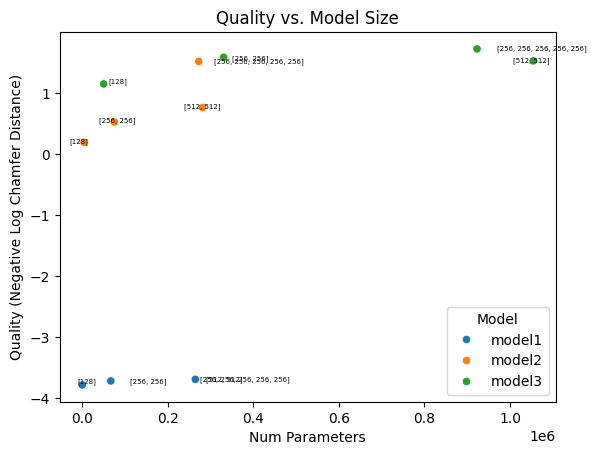

In [65]:
# uses seaborn scatterplot to plot the scaling law
# only uses 10,000 timesteps for the scaling law

import seaborn as sns

# We fix the number of timesteps to 10,000.
selected_df = df[df["Train Steps"] == 10000]
# model2 or 3
# df = df[df["Model"] != "model1"]

#color based on model
# adds layers as very small text next to point
sns.scatterplot(data=selected_df, x="Num Parameters", y="Quality (Negative Log Chamfer Distance)", hue="Model")
for i in range(len(selected_df)):
    plt.text(
        selected_df["Num Parameters"].iloc[i],
        selected_df["Quality (Negative Log Chamfer Distance)"].iloc[i],
        str(selected_df["Layers"].iloc[i]), fontsize=5)

plt.title("Quality vs. Model Size")
plt.show()

### Plot quality vs. training steps

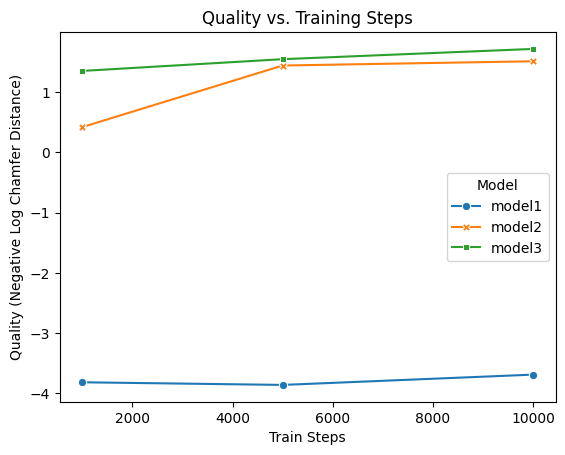

In [64]:

# We only look at the 5 layer model
selected_df = df[df["Layers"].astype(str) == '[256, 256, 256, 256, 256]']
sns.lineplot(data=selected_df, x="Train Steps", y="Quality (Negative Log Chamfer Distance)", hue="Model", style="Model", markers=True, dashes=False)
plt.title("Quality vs. Training Steps")
plt.show()


## Discussion questions

- Is it helpful to make the model wide or deep (e.g. [512, 512] vs. [256, 256, 256, 256, 256])?
- Is it helpful to train for more steps?
- What is the model architecture? Does model 3 dominate the other models?
